In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import emd
from statistics import mean
from scipy import signal, ndimage
from scipy import asarray as ar,exp

from scipy.optimize import curve_fit
import matplotlib.patches as ptc
from numpy.polynomial import Polynomial
from astropy.io import fits
import scienceplots
plt.style.use(['science','notebook','grid'])
import math
from scipy.stats import sem

In [2]:
import os
from scipy.io import readsav
entries = os.listdir('../ABDOR/Analysis_files')
anls=[]
for a in entries:
    anl=readsav('../ABDOR/Analysis_files/'+a)
    anls.append(anl)

In [3]:
# ##Using pandas dataframe
# X=[]
# T=[]
# Fs=[]
# for i in range(len(anls)):
#     df= pd.read_csv('../datasets/sample_light_curves/'+str(i)+'.csv')
#     t1=np.array(df['timestamps'])
#     wp1=df['ls']
#     x=np.array(wp1)

#     dt= t1[1]-t1[0]
#     fs= 1/dt
    
#     X.append(x)
#     T.append(t1)
#     Fs.append(fs)

In [4]:
##Using pandas dataframe
X=[]
T=[]
Fs=[]
for i in range(len(anls)):
    
    t1=anls[i]['tim']
    
    x=anls[i]['flx']

    dt= t1[1]-t1[0]
    fs= 1/dt
    
    X.append(x)
    T.append(t1)
    Fs.append(fs)

In [5]:
for i in range(len(X)):
    X[i]= X[i]-mean(X[i])
    X[i]=X[i]/np.sqrt(mean(X[i]**2))

In [6]:
# plt.figure(figsize=(10,12))
# for i in range(len(X)):
#     plt.subplot(len(X),1,i+1)
#     plt.plot(T[i],X[i], '-', color='brown', lw=1.5, label='signl')
#     plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('the signals')

In [7]:
imfm = []
n_imfm= []
for i in range(len(X)):
    
    imf= emd.sift.mask_sift(X[i],max_imfs=16)
    n_imf= len(imf[0,:])
    imfm.append(imf)
    n_imfm.append(n_imf)

 Inputs samples (336) is small for specified max_imfs (16) very likely that 7 or fewer imfs are returned
 Inputs samples (81) is small for specified max_imfs (16) very likely that 5 or fewer imfs are returned
 Inputs samples (121) is small for specified max_imfs (16) very likely that 5 or fewer imfs are returned
 Inputs samples (121) is small for specified max_imfs (16) very likely that 5 or fewer imfs are returned
 Inputs samples (81) is small for specified max_imfs (16) very likely that 5 or fewer imfs are returned
 Inputs samples (151) is small for specified max_imfs (16) very likely that 6 or fewer imfs are returned
 Inputs samples (46) is small for specified max_imfs (16) very likely that 4 or fewer imfs are returned
 Inputs samples (201) is small for specified max_imfs (16) very likely that 6 or fewer imfs are returned
 Inputs samples (201) is small for specified max_imfs (16) very likely that 6 or fewer imfs are returned
 Inputs samples (276) is small for specified max_imfs (16)

In [8]:
# plt.figure(figsize=(16,30))

# for i in range(len(X)):
#     plt.subplot(len(X)*2,2,(2*i)+1)
#     plt.plot(T[i],X[i],linewidth=1.5)
# for j in range(len(X)):
#     plt.subplot(len(X)*2,2,2*(j+1))
#     plt.plot(T[j],imfm[j],linewidth=1.5)

# plt.subplots_adjust(hspace=0)

In [9]:
def bm(List):
    mins=[]
    maxs=[]
    for n, i in enumerate(List[1:-1]):
            if List[n] < List[n-1] and List[n] < List[n+1]:
                mins.append(List[n])
            elif List[n] > List[n-1] and i> List[n+1]:
                maxs.append(List[n])
    return len(mins)+len(maxs)

In [10]:
E_ens=[]
P_ens=[]
E_X= []
P_X= []
for i in range(len(X)):
    Em=[]
    Pm=[]
    for j in range(n_imfm[i]-1):
        E=mean(imfm[i][:,j]**2)
        
        P=2*len(imfm[i][:,j])/bm(imfm[i][:,j])
        Em.append(E)
        Pm.append(P)

    E_X.append(mean(X[i]**2))
    P_X.append(2*len(X[i])/bm(X[i]))
    
    E_ens.append(np.array(Em))
    P_ens.append(np.array(Pm))

In [11]:
def log_fit(xi,yi,x,deg,col='green'):  
    coefficients = np.polyfit(np.log10(xi), np.log10(yi), deg)
    polynomial = np.poly1d(coefficients)
    log10_y_fit = polynomial(np.log10(x))  # <-- Changed

    L=[]
    L.append(x)
    L.append(10**log10_y_fit)
    return L

In [12]:
def emd_confidence(X,Y,level=95):

    Min=[]
    Sup=[]
    
    for i in range(len(Y)):
        sample_mean= mean(Y)
        _95ci = (1+ level/100) *sem(Y)
        sample_min= Y[i]- _95ci
        sample_max= Y[i] +_95ci
        Min.append(sample_min)
        Sup.append(sample_max)
        
    L= Min

    U= Sup
    
    return X,L,Y,U
    
    

In [13]:
def spread(x,k,N):
    return x+(k*(math.sqrt(2/N))*(np.e**(x/2))),x-(k*(math.sqrt(2/N))*(np.e**(x/2)))

0.00010262854206132444
0.00018051852961605672
0.00028534134114499386
0.00011736197630103718
0.000505337144002931
-0.000198258841702272
0.0010654561785657661
0.00023929696272168496
0.0005935349299739818
0.00040816083961541514
-0.0007096046583353822
7.270927328406493e-05
0.00031714498678724214
5.791181831144325e-05
0.0010316437523472048
0.001164472589522287
0.0004256224777305659
-0.0062002850609682745


/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipy

0.00042967263110649663
0.0010933148583308137
0.0003175300789900326
-0.0029536890923837016
0.0009476670360586253
0.00030305919022393025
0.0003521888205424069
0.0006296102866471235
0.0004540539244279515


/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3183299224.py:31: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipy

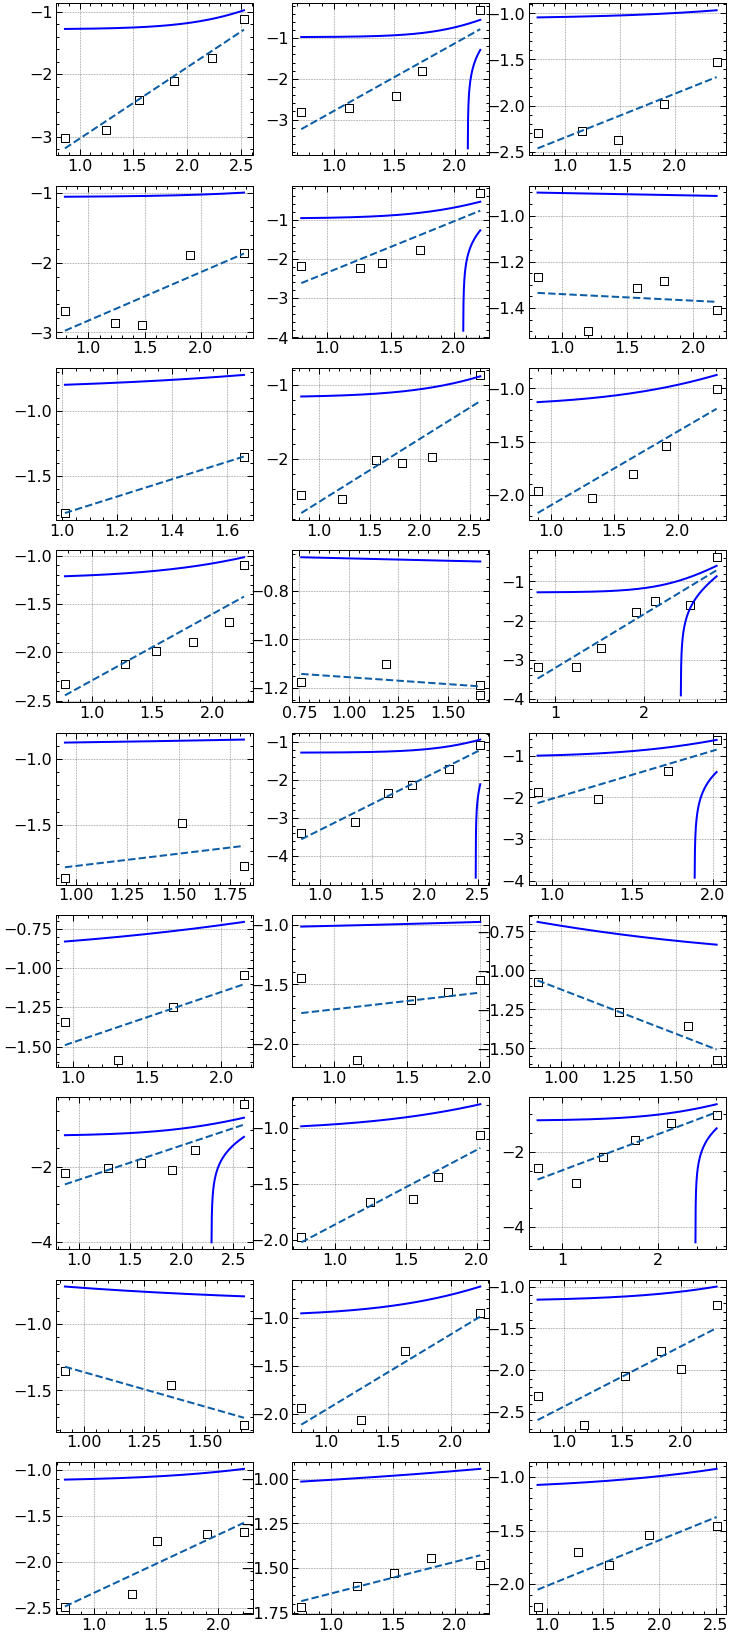

In [41]:
plt.figure(figsize=(12,90))

for i in range(len(X)):

    plt.subplot(len(X),3,i+1)    
    # plt.scatter(P_X[i],E_X[i],edgecolor='black',facecolor='yellow',s=70,marker='s')
    # plt.subplots_adjust(wspace=0, hspace=0)

    #     s=1
#     e=None

#     if i==0:
#         s,e=2,None
#     elif i==4:
#         s,e=1,-1
#     elif i==5:
#         s,e=2,None
    

    # lf= log_fit(Pm[1:],Em[1:],np.linspace(Pm[0],Pm[-1]),1)

    lf= log_fit(P_ens[i][:],E_ens[i][:],np.linspace(P_ens[i][0],P_ens[i][-1],1000),1)
    slope= (lf[1][1]-lf[1][0])/(lf[0][1]-lf[0][0])
    print(slope)

#     plt.title('Least square fit')
    plt.plot(np.log10(lf[0]),np.log10(lf[1]),'--')
    U,L=[],[]
    for j in range(len(lf[0])):
        u,l=spread(lf[1][j],0.675,len(X[i]))
        L.append(np.log10(l))
        U.append(np.log10(u))
    plt.plot(np.log10(lf[0]),U,color='blue')
    plt.plot(np.log10(lf[0]),L,color='blue')
    plt.scatter(np.log10(P_ens[i]),np.log10(E_ens[i]), marker='s',edgecolor='black',facecolor='white',s=70,linewidth=1)
    # plt.scatter(Pm[0],Em[0], marker='s',edgecolor='black',facecolor='lightgreen',s=70,linewidth=1)
    # plt.scatter(np.log10(P_X[i]),np.log10(E_X[i]),c='yellow',edgecolor='black',s=80,marker='s')

    # plt.savefig('power law fits')

0.00010518790371526622
0.00019567738983446801
0.0002617654170921941
0.00011208306680482132
0.00052172100119541
-0.0001805357914526054
0.0010598498009352314
0.00023099360702630818
0.0005755033047942413
0.00039298998916294383
-0.000686841912957452
8.297293017017625e-05
0.00030980710554590003
6.231862930645847e-05
0.0010398808831167449
0.0011148820036668463
0.0004014319013532056
-0.00598818740013873
0.00042251557557336587
0.001066304721685091
0.0003145538453886409
-0.0028651882797220735
0.0009261403265517568
0.0002922073598027856
0.0003383488849421159
0.0005751185796602344
0.0004166330804141079


/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/908231766.py:33: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))


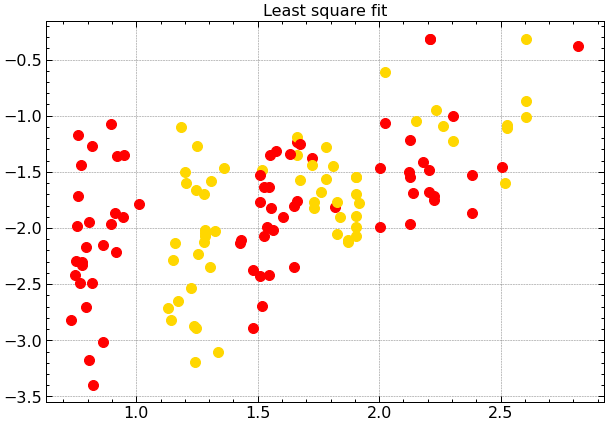

In [80]:
plt.figure(figsize=(10,7))

col=['red','gold']

for i in range(len(X)):

       
    # plt.scatter(P_X[i],E_X[i],edgecolor='black',facecolor='yellow',s=70,marker='s')
    # plt.subplots_adjust(wspace=0, hspace=0)

    s=1
    e=None

    if i==0:
        s,e=2,None
    elif i==4:
        s,e=1,-1
    elif i==5:
        s,e=2,None
    

    # lf= log_fit(Pm[1:],Em[1:],np.linspace(Pm[0],Pm[-1]),1)

    lf= log_fit(P_ens[i][:],E_ens[i][:],np.linspace(P_ens[i][0],P_ens[i][-1],100),1)
    slope= (lf[1][1]-lf[1][0])/(lf[0][1]-lf[0][0])
    print(slope)

    plt.title('Least square fit')
    # plt.plot(np.log10(lf[0]),np.log10(lf[1]),'--')
    U,L=[],[]
    for j in range(len(lf[0])):
        u,l=spread(lf[1][j],0.675,len(X[i]))
        L.append(np.log10(l))
        U.append(np.log10(u))
    # plt.plot(np.log10(lf[0]),U,color='blue')
    # plt.plot(np.log10(lf[0]),L,color='blue')
    for j in range(n_imfm[i]-1):
        plt.scatter(np.log10(P_ens[i][j]),np.log10(E_ens[i][j]),facecolor=col[j%2],s=100,linewidth=1,)
    # plt.scatter(Pm[0],Em[0], marker='s',edgecolor='black',facecolor='lightgreen',s=70,linewidth=1)
    # plt.plot(np.log10(P_ens[i]),np.log10(E_ens[i]),color=col[i])
    # plt.scatter(np.log10(P_X[i]),np.log10(E_X[i]),c='yellow',edgecolor='black',s=80,marker='s')

    # plt.savefig('power law fits')

In [42]:
# plt.figure(figsize=(12,60))

# for i in range(len(X)):

#     plt.subplot(len(X),3,i+1)    
#     # plt.scatter(P_X[i],E_X[i], marker='s',edgecolor='black',facecolor='yellow',s=70,linewidth=1)
#     plt.scatter(P_ens[i][:],E_ens[i][:], marker='s',edgecolor='black',facecolor='white',s=70,linewidth=1)
#     # plt.subplots_adjust(wspace=0, hspace=0)
#     plt.loglog()
# # plt.savefig('../results/the emd spectrums')

/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/3490862732.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c=plt.pcolormesh(T[i], hht_f, hht, cmap='magma_r')


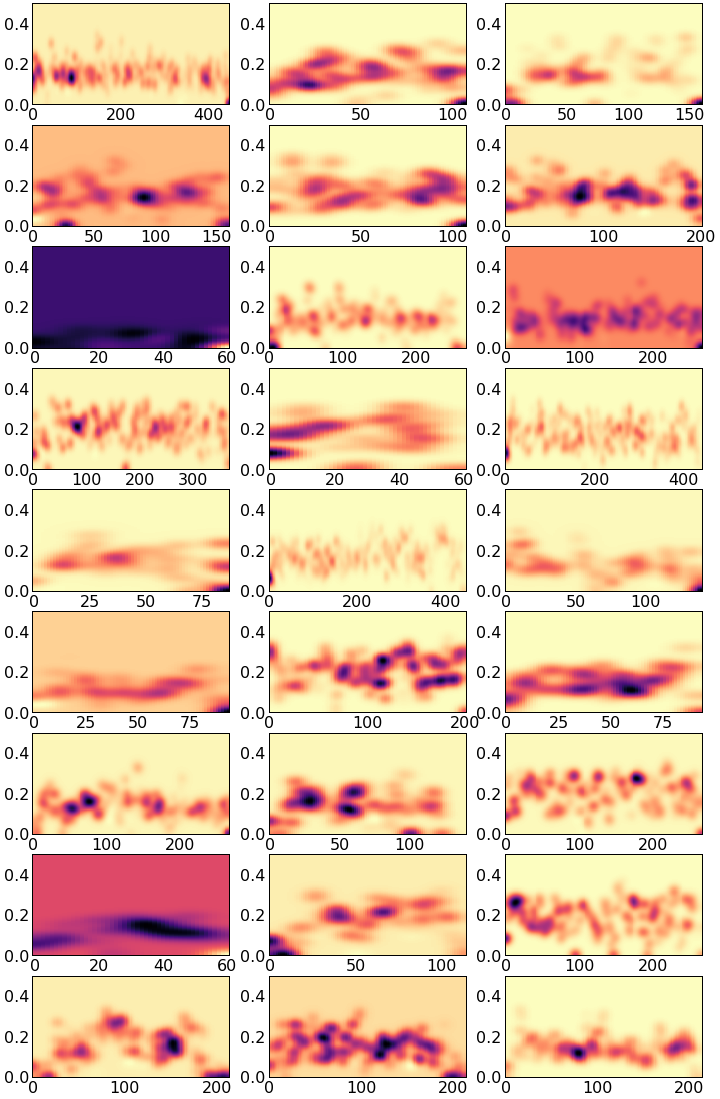

In [31]:
plt.figure(figsize=(12,60))

for i in range(len(X)):
    plt.subplot(len(X),3,i+1)
    IP, IF, IA = emd.spectra.frequency_transform(imfm[i], Fs[i], 'nht')
    freq_range = (0, .5, 100)
    hht_f, hht = emd.spectra.hilberthuang(IF[:,0], IA[:,0], freq_range, mode='amplitude', sum_time=False)
    hht = ndimage.gaussian_filter(hht, 4)
    c=plt.pcolormesh(T[i], hht_f, hht, cmap='magma_r')
    # plt.subplots_adjust(wspace=0, hspace=0)
    


# plt.savefig('../results/the hilbert spectrograms')

In [34]:
# def fourier(sig,sr):
#     X = np.fft.fft(sig)
#     N = len(X)
#     n = np.arange(N)
#     T = N/sr
#     freq = n/T 
#     return freq[:N//2], np.abs(X)[:N//2]


/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_33139/2835819628.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(1/fxx,pxx,c='black',alpha=.5)


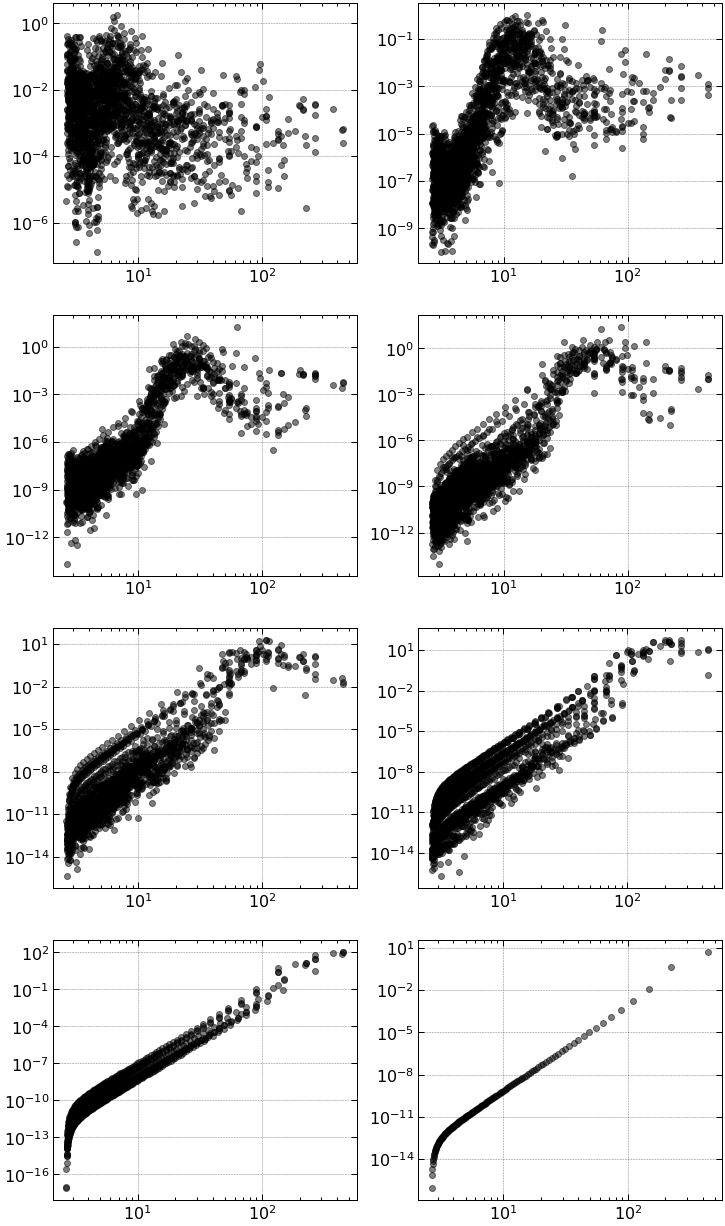

In [79]:
plt.figure(figsize=(12,45))


for k in range(1,9):
    plt.subplot(8,2,k)
    for i in range(len(X)):
        if k<=n_imfm[i]:
            fxx, pxx =sp.signal.welch(imfm[i][:,k-1],Fs[i],nperseg=len(T[i]))
            plt.scatter(1/fxx,pxx,c='black',alpha=.5)
            # plt.axvline(x=3,linestyle='--',color='black')
            plt.loglog()
# plt.subplots_adjust(hspace=0)


In [22]:
# plt.figure(figsize=(16,30))

# for i in range(len(X)):
#     plt.subplot(len(X)*2,2,(2*i)+1)
#     plt.plot(T[i],X[i])
# for j in range(len(X)):
#     plt.subplot(len(X)*2,2,2*(j+1))
#     plt.plot(T[j],imfm[j])

# plt.subplots_adjust(hspace=0)